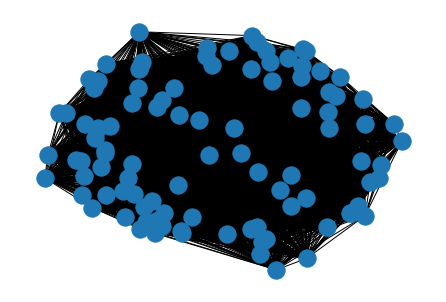

In [1]:
import networkx as nx;
from networkx.algorithms import approximation as approx
import random as rand;

rand.seed();

G = nx.complete_graph(100);

for (u, v) in G.edges():
    G.edges[u,v]['weight'] = rand.randint(100,999)

#for (u, v) in G.edges():
  #print(str(u) + ", " + str(v) + ": " + str(G.edges[u,v]['weight']));

nx.draw(G);

In [2]:
MAX_STEPS = 1000;
TERM_CONST = 3;

def exists(arr, val):
  for n in arr:
    if n == val:
      return True;

  return False;

def path_cost(path): #path cost of a path
    sum = 0;

    for i in range(0, len(path) - 1):
      sum += G.edges[path[i], path[i + 1]]['weight'];

    return sum;

def average_cost(pop): #average path cost
    sum = 0;

    for i in pop:
        sum += path_cost(i);

    return sum / len(pop);

def random_select(pop, baseline): #select individuals better than the baseline  
    i = rand.randint(0, len(pop) - 1);
    while path_cost(pop[i]) > baseline:
        i = rand.randint(0, len(pop) - 1);

    return pop[i];

def reproduce(mother, father): #preform cross over
    start = rand.randint(1, len(mother) - 2);
    stop = rand.randint(1, len(mother) - 2);
    while stop == start:
      stop = rand.randint(1, len(mother) - 2);
    
    child = [];
    for i in range(0, len(mother)):
      if i == 0:
        child.append(father[0]);
      elif i == len(mother) - 1:
        child.append(father[0]);
      elif (i >= start and i < stop) or (i >= start and start > stop) or (i < stop and start > stop):
        child.append(mother[i]);
      else:
        child.append(-1);
    j = stop;
    i = stop;
    while j != start:
      if child[j] == -1 and not exists(child, father[i]):
        child[j] = father[i];
        j = (j + 1) % len(child);
        i = (i + 1) % len(father);
      elif j == 0 or j == len(child) - 1:
        j = (j + 1) % len(father);
      else:
        i = (i + 1) % len(father);
          
    return child;

def mutate(child): #preform swap of nodes in the path
    pos = rand.randint(0, len(child) - 1);
    swap_pos = rand.randint(0, len(child) - 1);
    while swap_pos == pos:
        swap_pos = rand.randint(0, len(child) - 1);

    temp = child[pos];
    child[pos] = child[swap_pos];
    child[swap_pos] = temp;

    return child;

def dissimilar(pop, new_pop):
    if average_cost(new_pop) < (average_cost(pop) + (average_cost(pop) * .1)) or average_cost(new_pop) > (average_cost(pop) - (average_cost(pop) * .1)):
        return False;
    else:
        return True;

def best(pop): #return the fittest individual
    best_ind = pop[0];

    for i in pop:
        if path_cost(i) < path_cost(best_ind):
            best_ind = i;

    return best_ind;

def genetic_algorithm(pop):
    terminate = False;
    count = 0;
    time = 0;
    baseline = average_cost(pop);

    while True:
        new_pop = [];

        for i in range(0, len(pop)):
            mother = random_select(pop, baseline);
            father = mother.copy();
            while father == mother:
                father = random_select(pop, baseline);

            child = reproduce(mother, father);
            if rand.randint(1, 100) == 14:
                mutate(child);
            new_pop.append(child);

        if average_cost(pop) > average_cost(new_pop):
          baseline = average_cost(new_pop);
        if path_cost(best(pop)) > path_cost(best(new_pop)):
          pop = new_pop;

        #checking the condition for convergence of our population
        if dissimilar(pop, new_pop): #if the average is getting lower
            count = 0;
        elif count > TERM_CONST or time >= MAX_STEPS: #if our exit conditions are met
            return best(new_pop);
        else: #if the average is getting higher
            count += 1;

        time += 1;


In [3]:
def generate_pop(graph): #generates population of paths
    #using graph G generate the greedy path
    #create random paths from the path
  seed_path = approx.greedy_tsp(graph, 'weight');

  pop = [];

  for i in range(0, 50):
    temp = seed_path.copy();
    
    path = [];
    path.append(temp.pop(0));
    temp.pop(len(temp) - 1);

    for i in range(0, len(seed_path) - 2):
      path.append(temp.pop(rand.randint(0, len(temp) - 1)));
    
    path.append(path[0]);

    pop.append(path);


  return pop;

population = generate_pop(G);


In [5]:
print(average_cost(population));
print(path_cost(best(population)));

best_ind = genetic_algorithm(population);
if not best_ind:
  print("ERROR");
else:
  print(path_cost(best_ind));

55435.36
48597
45906
